# Part I - Prosper Loan Analytics
## by Lemboye Ayobami

## Introduction
> Introduce the dataset

The dataset includes information about 100,000 loans with several variablies detailing about the key factors behind the credit performance of loans. The objective is to explore the dataset to understand the performance of these loans, the factors that influence the loan terms and pricing and the key factors that can predict credit performance.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
prosper = pd.read_csv('prosperLoanData.csv')
prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

>The dataset includes 81 variables which can be grouped into four categories. 
1. Unique Identification Variables (Unique_ids)
2. General Information about the Listing (Gen_info)
3. Specific Information about the Loan (Loan_info)
4. Information about the credit performance (Credit_metrics)

These grouping can be accessed via the documentation - 'My Prosper Loan Data - Variable Definitions.csv'

In [3]:
prosper_var_grouping = pd.read_csv('My Prosper Loan Data - Variable Definitions - Sheet1.csv')
prosper_var_grouping.head(15)

,Variable,Description,Variable_Segment
0,ListingKey,"Unique key for each listing, same value as the...",Unique_ids
1,ListingNumber,The number that uniquely identifies the listin...,Unique_ids
2,ListingCreationDate,The date the listing was created.,Gen_Info
3,CreditGrade,The Credit rating that was assigned at the tim...,Loan_Info
4,Term,The length of the loan expressed in months.,Loan_Info
5,LoanStatus,"The current status of the loan: Cancelled, Ch...",Loan_Info
6,ClosedDate,"Closed date is applicable for Cancelled, Compl...",Loan_Info
7,BorrowerAPR,The Borrower's Annual Percentage Rate (APR) fo...,Loan_Info
8,BorrowerRate,The Borrower's interest rate for this loan.,Loan_Info
9,LenderYield,The Lender yield on the loan. Lender yield is ...,Loan_Info


#### Data Wrangling
1. Dropping duplicated observations
2. Dropping unnecessary columns.
    - Unique identifiers include ListingKey, ListingNumber, LoanNumber. Eliminating the redundant one.
    - Columns that would not be useful for the specific questions / insight generation process. Some include InvestmentFromFriendsCount etc.
3. Updating the timestamp information to date format for use

In [4]:
#confirming if the total duplicates are the same for all unique ids
duplicates_id1 = prosper.duplicated(subset='ListingKey').sum()
duplicates_id2 = prosper.duplicated(subset='ListingNumber').sum()
duplicates_id3 = prosper.duplicated(subset='LoanNumber').sum()

duplicates_id1 == duplicates_id2 and duplicates_id1 == duplicates_id3 and duplicates_id2 == duplicates_id3


True

In [5]:
#dropping duplicated observation via one of the unique ids
prosper.drop_duplicates(subset='ListingKey', inplace=True)
prosper.shape

(113066, 81)

In [6]:
prosper_var_grouping.Variable[80]

'Investors'

In [7]:
#dropping unnecessary columns

#programmatically extracting the names of the unnecessary columns
index_to_drop = [0, 7, 22, 23, 24, 50, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80 ]
col_to_drop =[]
for i in index_to_drop:
    col_to_drop.append(prosper_var_grouping.Variable[i])

col_to_drop


['ListingKey',
 'BorrowerAPR',
 'CurrentlyInGroup',
 'GroupKey',
 'DateCreditPulled',
 'LoanKey',
 'MemberKey',
 'LP_CustomerPayments',
 'LP_CustomerPrincipalPayments',
 'LP_InterestandFees',
 'LP_ServiceFees',
 'LP_CollectionFees',
 'LP_GrossPrincipalLoss',
 'LP_NetPrincipalLoss',
 'LP_NonPrincipalRecoverypayments',
 'PercentFunded',
 'InvestmentFromFriendsCount',
 'InvestmentFromFriendsAmount',
 'Investors']

In [8]:
#dropping the columns
prosper.drop(columns=col_to_drop, inplace=True)
prosper.shape

(113066, 62)

In [9]:
#converting timestamp into date
prosper['ListingCreationDate'] = pd.to_datetime(prosper.ListingCreationDate).dt.date
prosper['ClosedDate'] = pd.to_datetime(prosper.ClosedDate).dt.date
prosper['LoanOriginationDate'] = pd.to_datetime(prosper.LoanOriginationDate).dt.date
prosper['FirstRecordedCreditLine'] = pd.to_datetime(prosper.FirstRecordedCreditLine).dt.date

prosper.loc[:5, ['ListingCreationDate', 'ClosedDate', 'LoanOriginationDate', 'FirstRecordedCreditLine']]


,ListingCreationDate,ClosedDate,LoanOriginationDate,FirstRecordedCreditLine
0,2007-08-26,2009-08-14,2007-09-12,2001-10-11
1,2014-02-27,NaT,2014-03-03,1996-03-18
2,2007-01-05,2009-12-17,2007-01-17,2002-07-27
3,2012-10-22,NaT,2012-11-01,1983-02-28
4,2013-09-14,NaT,2013-09-20,2004-02-20
5,2013-12-14,NaT,2013-12-24,1973-03-01


### What is the structure of your dataset?

> There are about 113,000 loans with 62 variables that describes the loan information, terms and the performance in addition to information about the borrower's including his prior credit performance and income range. A lot of the variables are very quantitative and specific to the some types of loans. In addition, **some variables are only active for loans post July 2009**. This will be important in our analysis.

### What is/are the main feature(s) of interest in your dataset?

> There are three key interesting concepts I plan to explore
1. Understanding the characteristics of loans and the lender
2. Identify the factors that could explain or influence the loan terms, especially the interest rate
3. Highlights factors that are significant to the credit performance of a loan, especially the loan status.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the amount, type of loan, credit grade will be important in determining the borrower's interest rate. In addition, I estimate the higher the borrower's rate and the loan payment, the higher the chance of default. I would also like to investigate the performance of different types of loans

## Univariate Exploration

#### Understanding the distribution of key variables

What are the distribution of key loan information
> Loan Information
1. What type of loan is collected?
2. How long are the loan collected?
3. What is the size of the loan collected?

>Borrowers Information
4. Who collects the loans?
5. What is their distribution of income level?

>Credit Specific Information
6. What is the credit grade of the loan?
7. What is the typical interest rate payable?
8. What is the typical performance of the loans? 

In [10]:
#Key features to explore individually
prosper.loc[:5, ['Term', 'ListingCategory (numeric)', 'Occupation', 'EmploymentStatus', 'BorrowerRate', 'LoanOriginalAmount', 'LoanOriginationQuarter', 'LoanStatus', 'IncomeRange', 'StatedMonthlyIncome', 'ProsperRating (Alpha)', 'CreditGrade']]

,Term,ListingCategory (numeric),Occupation,EmploymentStatus,BorrowerRate,LoanOriginalAmount,LoanOriginationQuarter,LoanStatus,IncomeRange,StatedMonthlyIncome,ProsperRating (Alpha),CreditGrade
0,36,0,Other,Self-employed,0.1580,9425,Q3 2007,Completed,"$25,000-49,999",3083.333333,NaN,C
1,36,2,Professional,Employed,0.0920,10000,Q1 2014,Current,"$50,000-74,999",6125.000000,A,NaN
2,36,0,Other,Not available,0.2750,3001,Q1 2007,Completed,Not displayed,2083.333333,NaN,HR
3,36,16,Skilled Labor,Employed,0.0974,10000,Q4 2012,Current,"$25,000-49,999",2875.000000,A,NaN
4,36,2,Executive,Employed,0.2085,15000,Q3 2013,Current,"$100,000+",9583.333333,D,NaN
5,60,1,Professional,Employed,0.1314,15000,Q4 2013,Current,"$100,000+",8333.333333,B,NaN


A couple of observation
- Credit Grade and Prosper Rating (Alpha) serve the same purpose but for two periods (pre July 2009 and post July 2009). Both of them needs to be merged into a single column
- ListingCategory is in numeric and can be replaced with the category names
- A new column called Annual Income can be developed from StatedMonthlyIncome
- The Loan Origination Quarter includes the year of Origination. The Quarter will need to be isolated from the data

> What type of loan is collected?
- Distribution of ListingCategory

In [11]:
#Exploring ListingCategory

#Updating Listing Category with Category Names
ListingCategory_dict = {0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 4:'Personal Loan', 5:'Student Use', 6:'Auto', 7:'Other', 8:'Baby&Adoption', 
9:'Boat', 10:'Cosmetic Procedure', 11:'Engagement Ring', 12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases', 15:'Medical/Dental', 16:'Motorcycle', 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}

prosper['ListingCategory (numeric)'].replace(ListingCategory_dict, inplace=True)

prosper.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace=True) #Ensuring more effective column name

prosper['ListingCategory']

0              Not Available
1           Home Improvement
2              Not Available
3                 Motorcycle
4           Home Improvement
                 ...        
113932    Debt Consolidation
113933                 Other
113934    Debt Consolidation
113935      Home Improvement
113936    Debt Consolidation
Name: ListingCategory, Length: 113066, dtype: object

Text(0.5, 1.0, 'Distribution of Uses of Loan Collected')

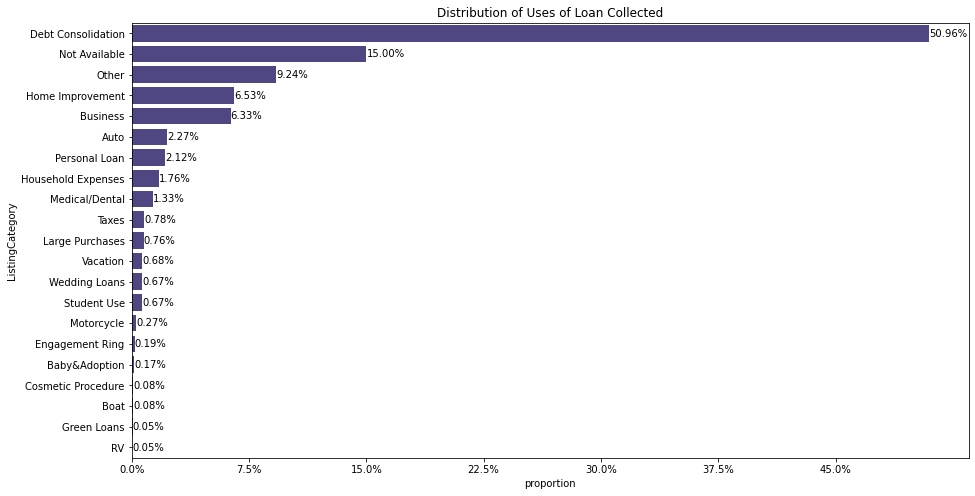

In [12]:
#Visualizing the distribution of Loan Type / Use

plt.figure(figsize=(15, 8))

countz = prosper['ListingCategory'].value_counts()
max_props = countz[0] / prosper.shape[0]
tick_props = np.arange(0, max_props, 0.075)
tick_names = ['{:0.1f}%'.format(v) for v in tick_props*100]

sns.countplot(data=prosper,y='ListingCategory', order=countz.index, color='darkslateblue');

for i in range(countz.shape[0]):
    i_count = countz[i]
    pct_string ='{:0.2f}%'.format(100 * i_count / countz.sum())

    plt.text(i_count+2, i, pct_string, va='center')

plt.xticks(tick_props*prosper.shape[0],tick_names);
plt.xlabel('proportion');
plt.title('Distribution of Uses of Loan Collected')

Insights from the data shows that about half of the loans collected are for debt consoldiation. This is insightful because it highlights a couple of things. 
1. Most of the customers have credit history and existing outstanding credit.
2. It can be deduced that there is high demand for simplicity in credit and favourable interest rate.

In addition, capital expenses or investment also take up a significant portion of the loan collected. They include Home Improvement, Business and Auto Loans

In [13]:
#To simplify and hasten visualization, Defining functions for plot creation

#plotting an horizontal bar chart for categorical data
def plt_bar_categorical(col, fig_size, color, title):
    plt.figure(figsize=fig_size)

    countz = prosper[col].value_counts()
    max_props = countz[0] / prosper.shape[0]
    tick_props = np.arange(0, max_props, 0.075)
    tick_names = ['{:0.1f}%'.format(v) for v in tick_props*100]

    sns.countplot(data=prosper,y=col, order=countz.index, color=color);

    for i in range(countz.shape[0]):
        i_count = countz[i]
        pct_string ='{:0.2f}%'.format(100 * i_count / countz.sum())

        plt.text(i_count+2, i, pct_string, va='center')

    plt.xticks([]);
    plt.xlabel('');

    plt.title(title, fontweight='bold')


#plotting a vertical bar chart for ordinal data
def plt_bar_ordinal(col, order, fig_size, color, title):
    plt.figure(figsize=fig_size)

    countz = prosper[col].value_counts()

    sns.countplot(data=prosper,x=col, order=order, color=color);

    for i, j in zip(order, range(len(order))):
        i_count = countz[i]
        pct_string ='{:0.1f}%'.format(100 * i_count / countz.sum())

        plt.text(j, i_count+100, pct_string, ha='center')

    plt.ylabel('');

    plt.title(title, fontweight='bold')

#plotting a standard histogram for quantitative data
def plt_hist(col, b_width, fig_size, title):
    plt.figure(figsize=fig_size)

    bins = np.arange(0, prosper[col].max()+b_width, b_width)
    plt.hist(data=prosper, x=col, bins=bins);

    plt.title(title, fontweight='bold')

> How long are the loans? (Duration)

> What are the sizes of the loan (LoanAmount)

In [14]:
prosper.Term.unique()

array([36, 60, 12])

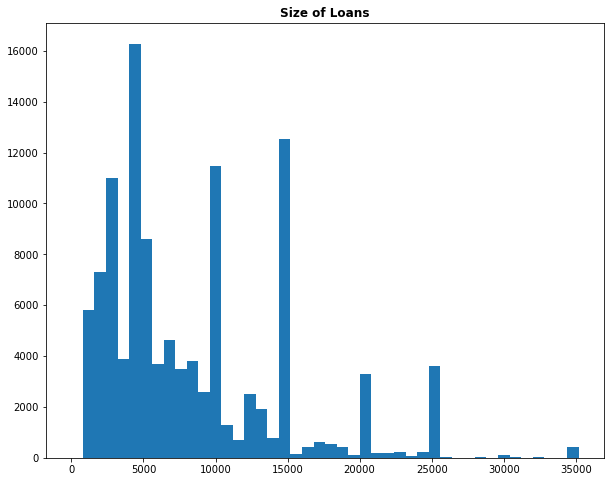

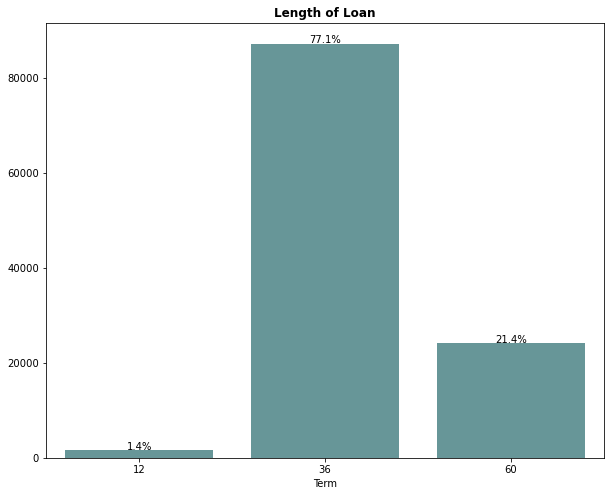

In [15]:
plt_hist(col='LoanOriginalAmount', b_width=800, fig_size=(10, 8), title='Size of Loans');
plt_bar_ordinal(col='Term', order=[12,36,60], fig_size=(10,8), color='cadetblue', title='Length of Loan');

> The distribtution of loan size is skewed to the right. This shows that many of the loans are below $10k. Initial hypothesis is that this could result in a lot less default given that most loans are manageable by most households in the US.

> About 3 out of every 4 loans have a duration of 36 months. Practically all the loans are payable after more than a year from collection. This can further be explained by the fact tthat most loans are for debt consolidation uses.

>Borrowers Information
4. Who collects the loans?
5. When do they collect loans?
6. What is their distribution of income level?

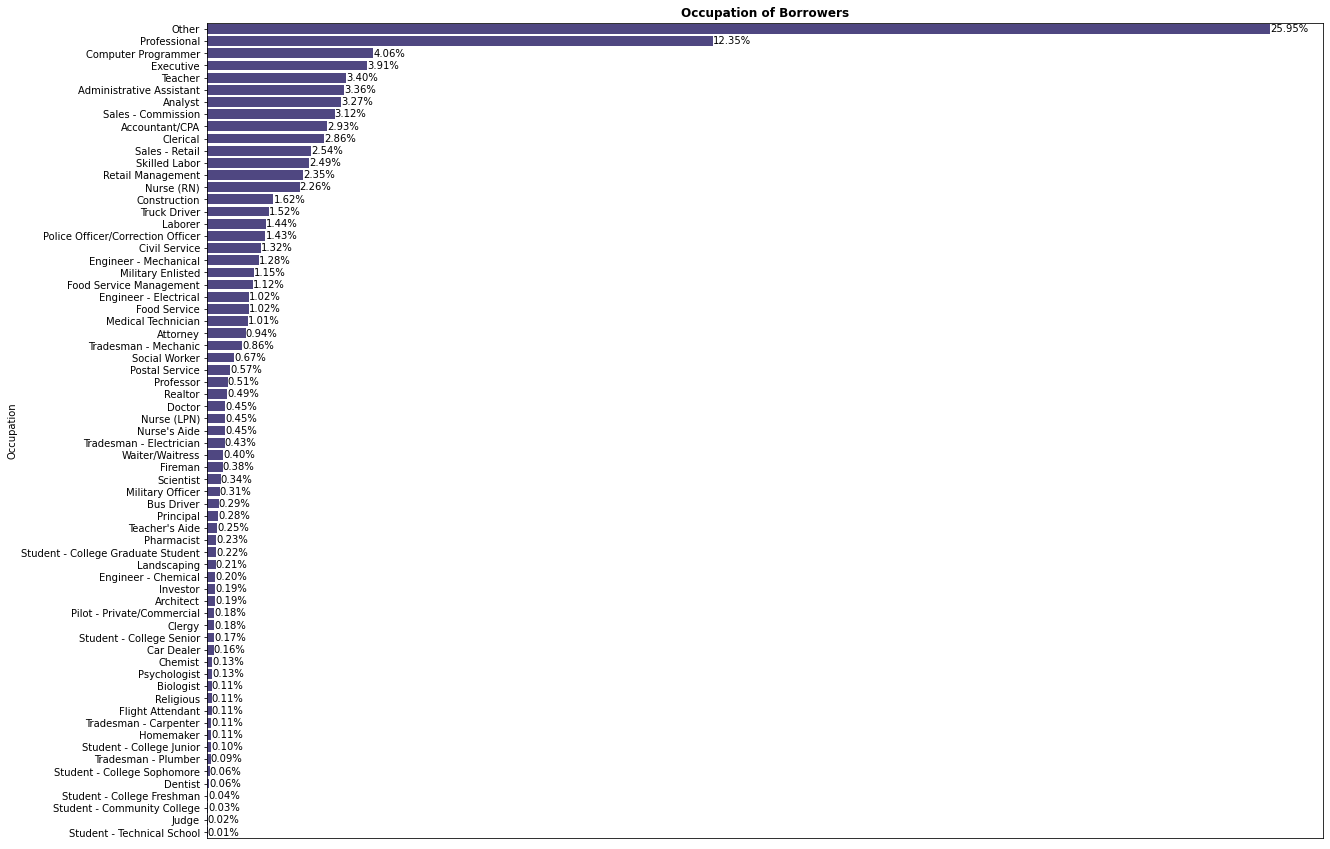

In [16]:
plt_bar_categorical(col='Occupation', fig_size=(20,15), color='darkslateblue', title='Occupation of Borrowers');

> It is interesting that the top top occupation are skilled in nature. It will be fascinating to further segment this specific occupation into more manageeable sectors.

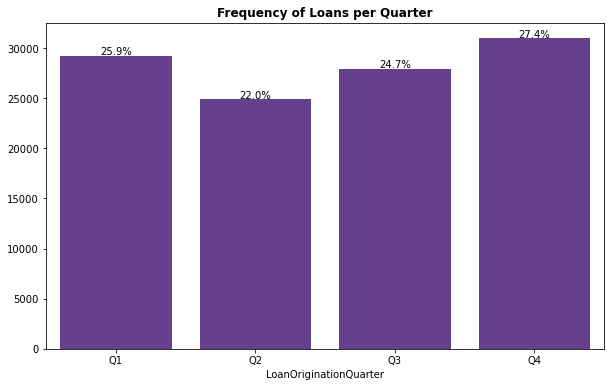

In [17]:
#Removing the year from the Loan Origination Quarter Data to isolate the Quarter
prosper.LoanOriginationQuarter = prosper.LoanOriginationQuarter.apply(lambda x : x.split()[0])

plt_bar_ordinal(col='LoanOriginationQuarter', order=['Q1', 'Q2', 'Q3', 'Q4'], color='rebeccapurple', title='Frequency of Loans per Quarter', fig_size=(10, 6));

Unsuprisingly, Q4 is the more popular period for loan collection. It would be interesting to look further into the loan terms per quarter like loan size or type of loans.

(0.0, 300000.0)

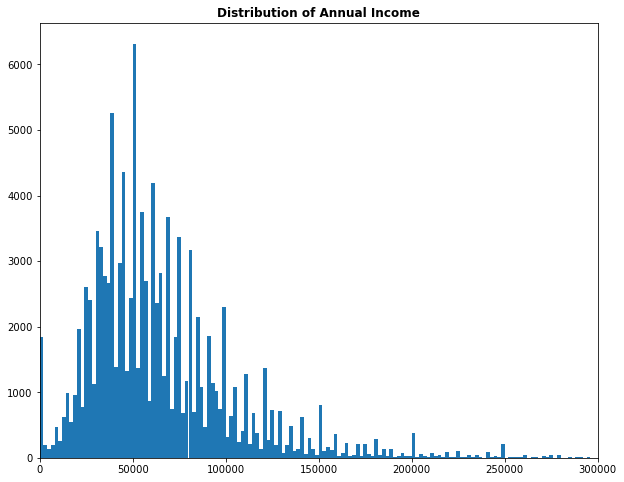

In [18]:
#Creating a new column called Annual Income
prosper['AnnualIncome'] = prosper.StatedMonthlyIncome * 12

plt_hist(col='AnnualIncome', b_width=2000, fig_size=(10,8), title='Distribution of Annual Income');
plt.xlim(0, 300000) #removing income ranges above $300k annually

The annual income is also skilled to the right, similar to the size of loan. I am interested to see the relationship between Income level and Monthly payment in the bivariate analysis section

>Credit Specific Information
6. What is the credit grade of the loan?
7. What is the typical interest rate payable?
8. What is the typical performance of the loans? 

In [19]:
#Merging Credit Grade and Prosper Rating (Alpha) since they are the same variables for two different period either side of July 2009

prosper['CreditRating'] = np.where(prosper.CreditGrade.isna()==False, prosper.CreditGrade, prosper['ProsperRating (Alpha)'])
prosper.CreditRating

0          C
1          A
2         HR
3          A
4          D
          ..
113932     C
113933     A
113934     D
113935     C
113936     A
Name: CreditRating, Length: 113066, dtype: object

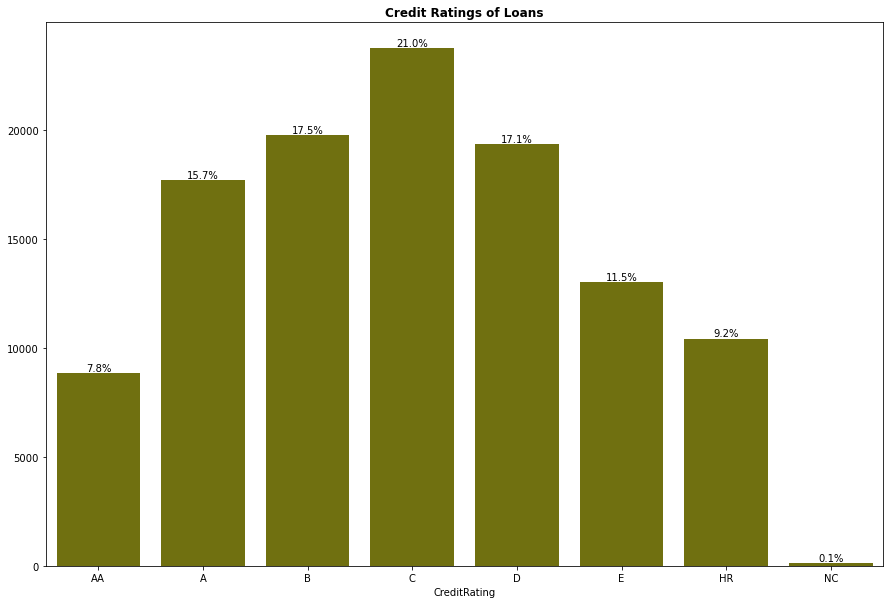

In [20]:
plt_bar_ordinal(col='CreditRating', order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'], color='olive', title='Credit Ratings of Loans', fig_size=(15, 10));

The credit rating is normally distributed. An exploration of factors that assist the development of the credit rating will be explored in the bivariate and multivariate analsysis section.

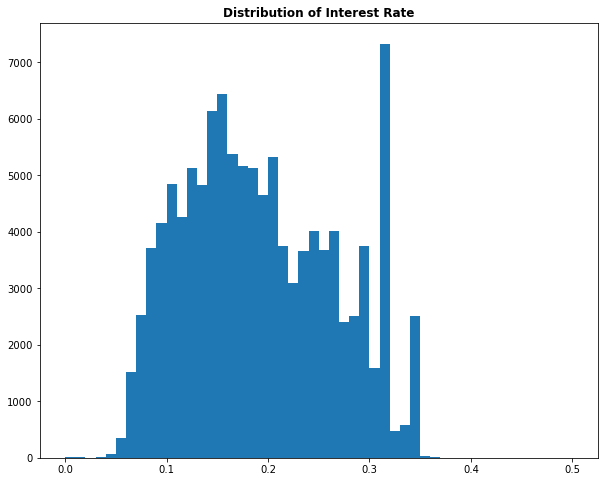

In [21]:
plt_hist(col='BorrowerRate', b_width=0.01, fig_size=(10,8), title='Distribution of Interest Rate');

The visualization shows that the interest rate is bi-modal in nature. Interest rate are most likely to fall within the ranges (10%-15%) or (30%-35%). It would be fascinating to see how the type of loans influence the interest rate.

In [22]:
#Merging all Past Due Status together
prosper.LoanStatus.replace(to_replace=r'\APast Due.*', value='Past Due', regex=True, inplace=True)
prosper.LoanStatus.value_counts()

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5018
Past Due                   2057
FinalPaymentInProgress      203
Cancelled                     5
Name: LoanStatus, dtype: int64

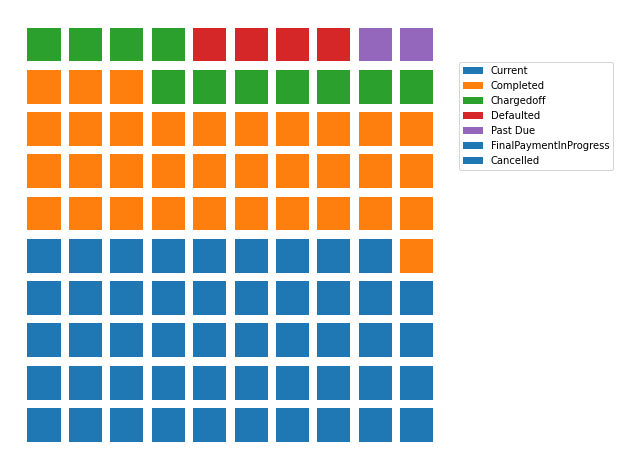

In [23]:
percentages = 100 * prosper.LoanStatus.value_counts(normalize=True)
gen_count = percentages.round(0)


plt.figure(figsize=[8, 8])

prev_count = 0
for gen in gen_count.index:
    blocks = np.arange(prev_count, prev_count+gen_count[gen])
    x = blocks % 10 #to get how many blocks per the x-axis (0-9)
    y = blocks // 10 #to get how many blocks per y-axis ()
    plt.bar(x=x, height=0.8, width=0.8, bottom=y)
    prev_count += gen_count[gen]

plt.legend(gen_count.index, bbox_to_anchor=(1, 0.75), loc=6);
plt.axis('off');

The waffle chart shows the proportion of loan that are still active, completed, charged-off, defaulted or past due. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The interest rate bi-modal distrbition is fascinating. It shows that there are two popular options for interest rate depending on several factors. The combination and creation of the complete CreditRating was important and it shows that Credit Grade is normally distributed. Comparing both distribution, interest rate and credit ratings, shows that there are more factors in play in determining the interest rate. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The annual income had very extreme outliers that required trimming. The distribution of annual income was still heavily skewed to the right, even after the adjustment.

## Bivariate Exploration

There are three main relationship I would be exploring

> Relationship of key variables with the Interest Rate Charge. This helps explain the factors that are considered in setting the interest rate.

> Relationship of key variables with the Size of Loan collected. It is interesting to figure out what contributes to the loan basket size expecially from the borrowers perspective.

> Relationship of key variables with Loan Status. This helps explain the potential critical factors that influence credit performance like default.

#### Exploring Variables interaction with Interest Rate

> Does the Size of Loan influence the interest rate charged?

> Does your monthly income make a positive influence in your interest rate?

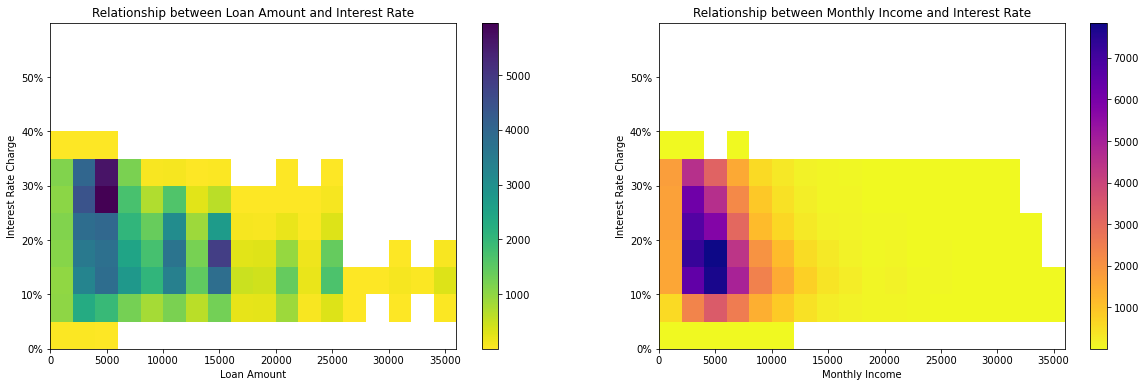

In [24]:
#Plotting the Relationship between Loan Size, Monthly Income with Interest Rate
plt.figure(figsize=(20,6))


plt.subplot(1, 2, 1)
bins_x = np.arange(0, 35000+2000, 2000)
bins_y = np.arange(0, 0.6+0.05, 0.05)
plt.hist2d(data=prosper, x='LoanOriginalAmount', y='BorrowerRate', cmin=5, cmap='viridis_r', bins=[bins_x, bins_y]);
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate Charge')
lab = 100 * np.arange(0, 0.6, 0.1)
labels= ['{:0.0f}%'.format(v) for v in lab]
plt.yticks(ticks=lab/100, labels=labels)
plt.title('Relationship between Loan Amount and Interest Rate')
plt.colorbar();

plt.subplot(1, 2, 2)
bins_x = np.arange(0, 35000+2000, 2000)
bins_y = np.arange(0, 0.6+0.05, 0.05)
plt.hist2d(data=prosper, x='StatedMonthlyIncome', y='BorrowerRate', cmin=5, cmap='plasma_r', bins=[bins_x, bins_y]);
plt.xlabel('Monthly Income')
plt.ylabel('Interest Rate Charge')
lab = 100 * np.arange(0, 0.6, 0.1)
labels= ['{:0.0f}%'.format(v) for v in lab]
plt.yticks(ticks=lab/100, labels=labels)
plt.title('Relationship between Monthly Income and Interest Rate')
plt.colorbar();

The first chart suggest that there could be a inverse relationship between the loan amount and the interest rate. This beggars more question because it suggest that borrowers are incentivized to go bigger. I suggest another variable could explain this - MonthlyIncome or Income Range. An hypothesis could be that the bigger loan size are subscribed by higher earning individuals which then influences the rate. The relationship between income and loan size will be explored later

The second chart also suggest an inverse relationship between interest rate charge and monthly income. It shows clearly shows that the bulk of loans are collected by Monthly earners between $2500 and $7500.

> How does Credit Rating affect Interest Rate Charge?

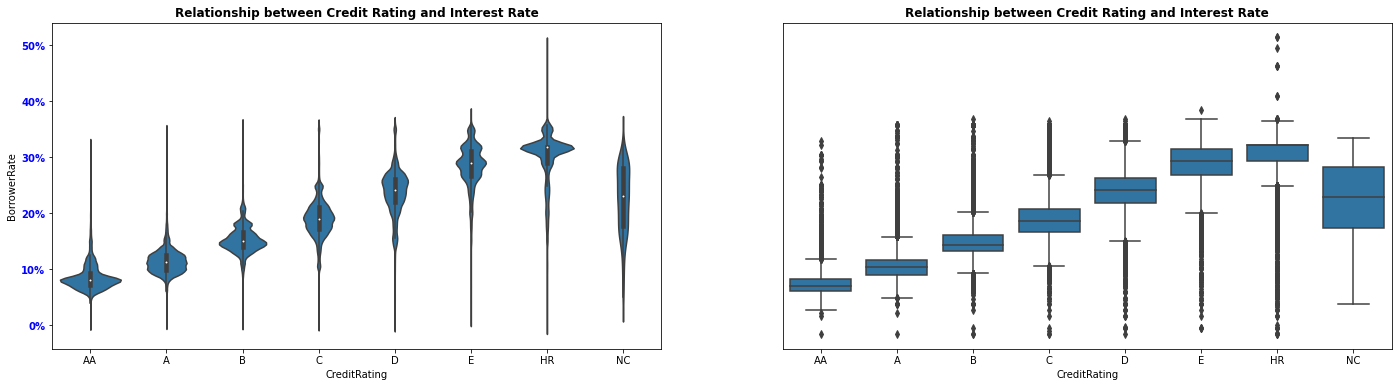

In [25]:
credit_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']
credit_classes = pd.api.types.CategoricalDtype(ordered=True, categories=credit_order)
prosper.CreditRating = prosper.CreditRating.astype(credit_classes);

plt.figure(figsize=(24,6))

plt.subplot(1, 2, 1)
sns.violinplot(data=prosper, x='CreditRating', y='BorrowerRate', color=sns.color_palette()[0]);
lab = 100 * np.arange(0, 0.6, 0.1)
labels= ['{:0.0f}%'.format(v) for v in lab]
plt.yticks(fontweight='bold', color='blue', ticks=lab/100, labels=labels)
plt.title('Relationship between Credit Rating and Interest Rate', fontweight='bold');


plt.subplot(1, 2, 2)
sns.boxplot(data=prosper, x='CreditRating', y='BorrowerRate', color=sns.color_palette()[0]);
plt.title('Relationship between Credit Rating and Interest Rate', fontweight='bold');
plt.ylabel('');
plt.yticks([]);

It is clearly demonstrated that Credit Rating is very correlated with Interest Rate Charge. It is highly reasonable to suggest that it is one of the critical factors considered in deriving interest rate payable on a loan.

> Does the type of loan / uses of loan play a key role in the interest rate payable?

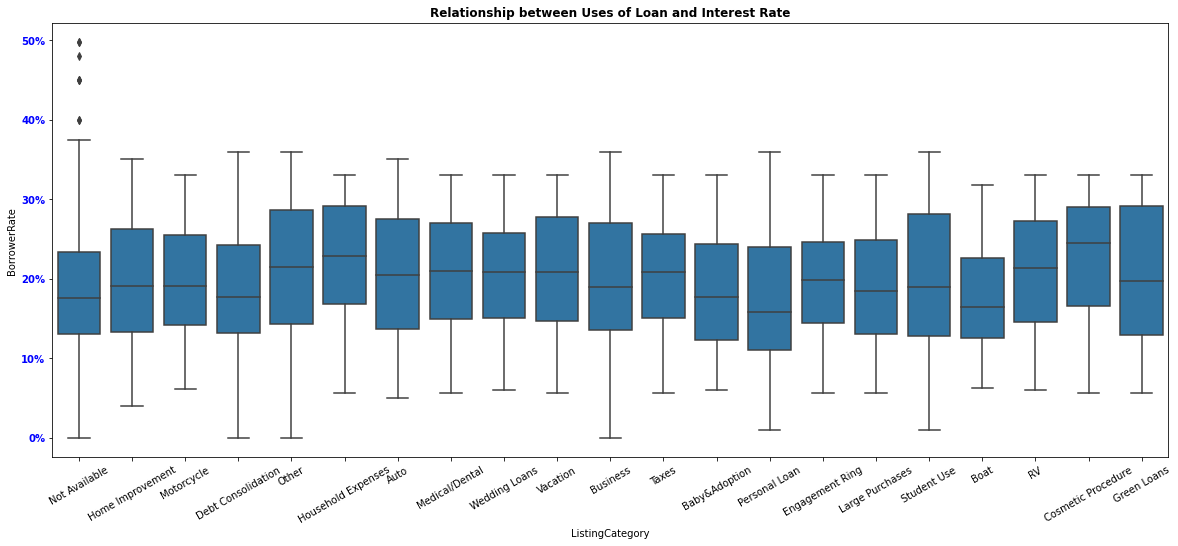

In [26]:
plt.figure(figsize=(20, 8))

sns.boxplot(data=prosper, x='ListingCategory', y='BorrowerRate', color=sns.color_palette()[0]);
lab = 100 * np.arange(0, 0.6, 0.1)
labels= ['{:0.0f}%'.format(v) for v in lab]
plt.xticks(rotation=30);
plt.yticks(fontweight='bold', color='blue', ticks=lab/100, labels=labels);
plt.title('Relationship between Uses of Loan and Interest Rate', fontweight='bold');

There are lots of potential insight from the chart, including the height of the box plot which indicate the interest rate range for specific causes. However, the uses of loan does not seem to have a significant impact on the interest rate payable by the borrower.

#### Exploring Variables interaction with Loan Size

> Does the income earnings influence the size of loan taken by borrowers?

> Does the use of loan influence the size of loan taken by borrowers?

> Does the period of time in the year influence the size of loan taken?

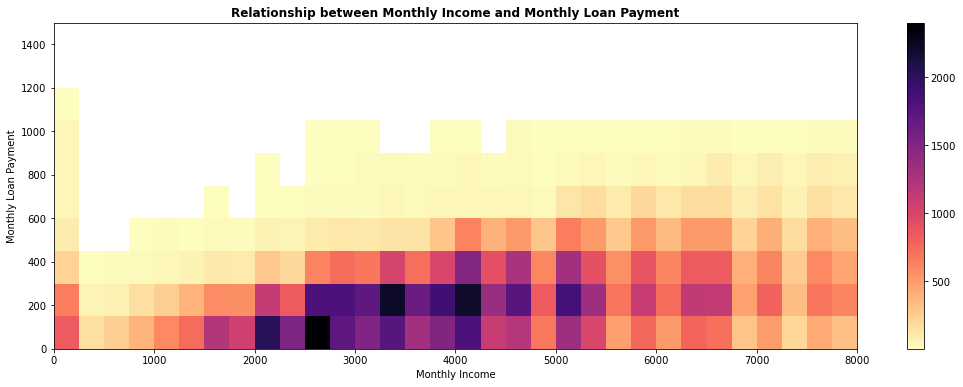

In [27]:
plt.figure(figsize=(18,6))

bins_x = np.arange(0, 8000+250, 250)
bins_y = np.arange(0, 1500+150, 150)
plt.hist2d(data=prosper, x='StatedMonthlyIncome', y='MonthlyLoanPayment', cmin=5, cmap='magma_r', bins=[bins_x, bins_y]);
plt.xlabel('Monthly Income')
plt.ylabel('Monthly Loan Payment')
plt.title('Relationship between Monthly Income and Monthly Loan Payment', fontweight='bold')
plt.xlim((0, 8000))
plt.colorbar();

The chart highlights that monthly income bracket influences the size of loan borrowers, albeit there are outlier behaviour with monthly earners of $250 and below.

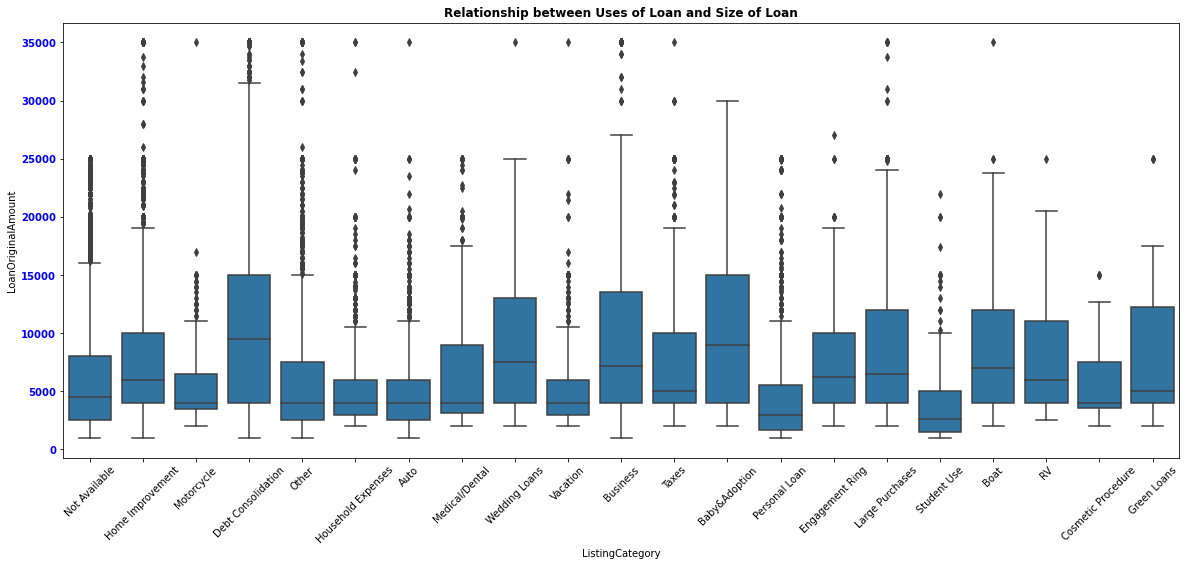

In [28]:
plt.figure(figsize=(20, 8))

sns.boxplot(data=prosper, x='ListingCategory', y='LoanOriginalAmount', color=sns.color_palette()[0]);
plt.xticks(rotation=45);
plt.yticks(fontweight='bold', color='blue');
plt.title('Relationship between Uses of Loan and Size of Loan', fontweight='bold');

The uses of loan also plays a part in the size of loan obtained. Debt Consolidation, Wedding Loans, Business, Baby & Adoption, Large purchases and Green Loans dominates the larger ticket sizes.


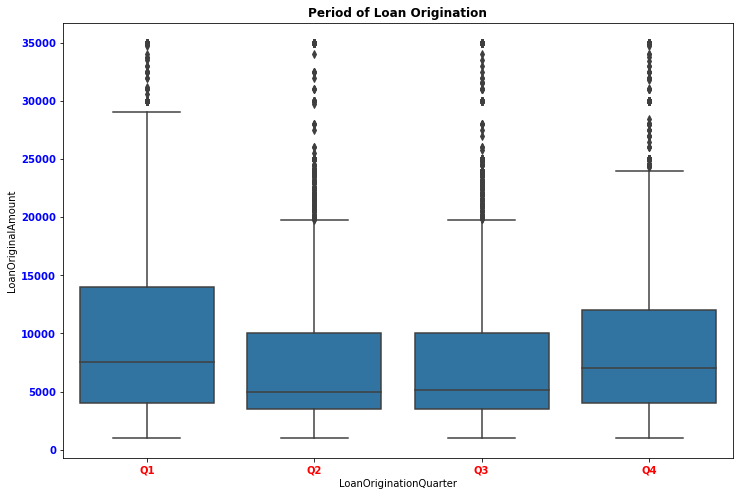

In [29]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=prosper, x='LoanOriginationQuarter', y='LoanOriginalAmount', order=['Q1', 'Q2', 'Q3', 'Q4'], color=sns.color_palette()[0]);
plt.xticks(fontweight='bold', color='red');
plt.yticks(fontweight='bold', color='blue');
plt.title('Period of Loan Origination', fontweight='bold');

Similar to the frequency of loans, Q1 and Q4 are also notorious for larger sizes of loan compared with other periods of the year

#### Exploring Variables interaction with Loan Statis

> Does size of loan influence the outcome of loan?

> Does the interest rate charge influence the outcome of the loan?

> Does the credit rating of the borrower influence the outcome of the loan?

> Does the employment status of the borrower influence the outcome of the loan?

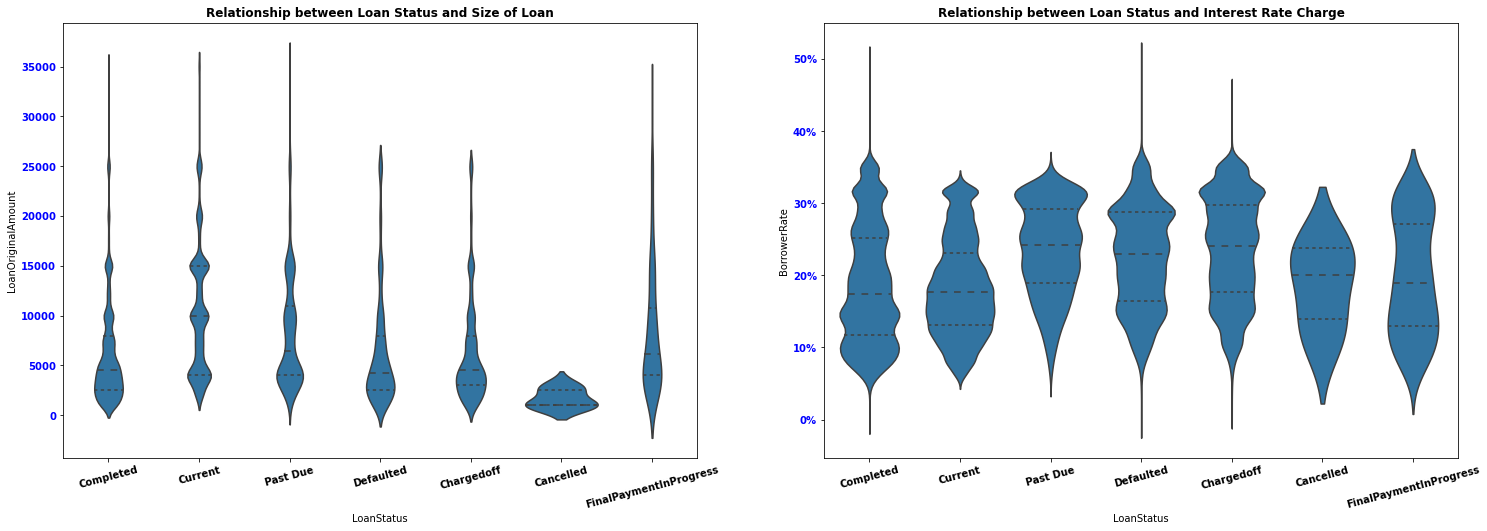

In [30]:
plt.figure(figsize=(25, 8))

plt.subplot(1, 2, 1)
sns.violinplot(data=prosper, x='LoanStatus', y='LoanOriginalAmount', color=sns.color_palette()[0], inner='quartile');
plt.xticks(fontweight='bold', color='black', rotation=15);
plt.yticks(fontweight='bold', color='blue');
plt.title('Relationship between Loan Status and Size of Loan', fontweight='bold');


plt.subplot(1, 2, 2)
sns.violinplot(data=prosper, x='LoanStatus', y='BorrowerRate', color=sns.color_palette()[0], inner='quartile');
plt.xticks(fontweight='bold', color='black', rotation=15);
lab = 100 * np.arange(0, 0.6, 0.1)
labels= ['{:0.0f}%'.format(v) for v in lab]
plt.yticks(fontweight='bold', color='blue', ticks=lab/100, labels=labels)
plt.title('Relationship between Loan Status and Interest Rate Charge', fontweight='bold');

The higher the interest rate charged, the higher the probability of default or charged off. Loan Size play a less significant role however.

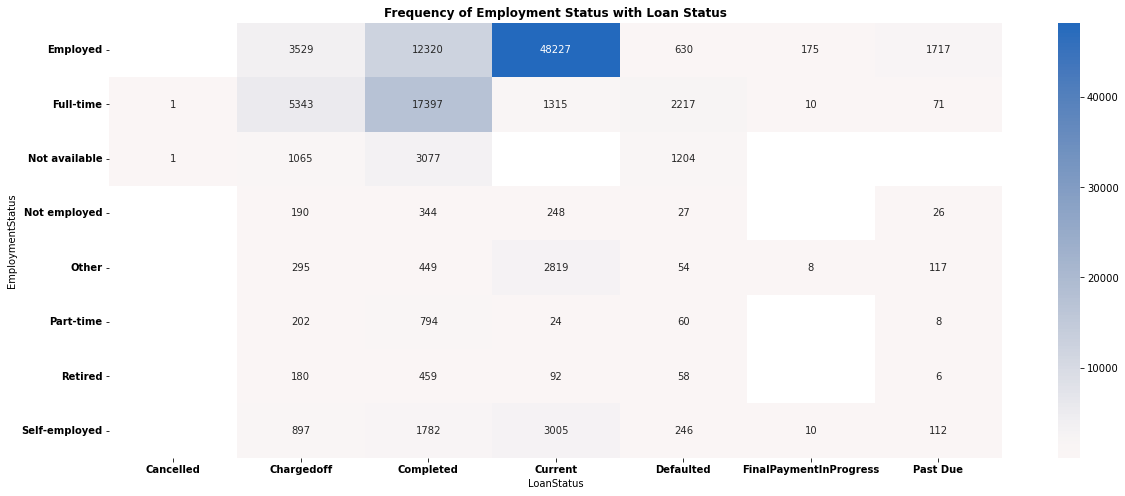

In [31]:
ct_counts = prosper.groupby(['LoanStatus', 'EmploymentStatus']).size()
ct_counts = ct_counts.reset_index(name='Count')
ct_counts = ct_counts.pivot(index='EmploymentStatus', columns='LoanStatus', values='Count')

plt.figure(figsize=(20, 8))
sns.heatmap(ct_counts, annot=True, fmt='.0f', cmap = 'vlag_r', center = 0);
plt.title('Frequency of Employment Status with Loan Status', fontweight='bold');
plt.xticks(fontweight='bold');
plt.yticks(fontweight='bold');

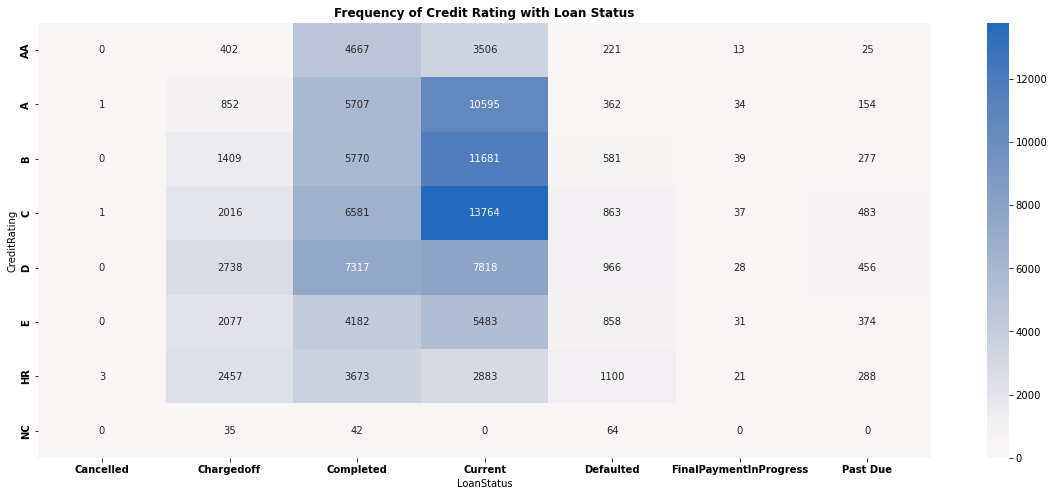

In [32]:
ct_counts = prosper.groupby(['LoanStatus', 'CreditRating']).size()
ct_counts = ct_counts.reset_index(name='Count')
ct_counts = ct_counts.pivot(index='CreditRating', columns='LoanStatus', values='Count')

plt.figure(figsize=(20, 8))
sns.heatmap(ct_counts, annot=True, fmt='.0f', cmap = 'vlag_r', center = 0);
plt.title('Frequency of Credit Rating with Loan Status', fontweight='bold');
plt.xticks(fontweight='bold');
plt.yticks(fontweight='bold');

## Multivariate Exploration

There are two main relationship I am looking to explore.

> The combined relationship between interest rate charge, monthly income and credit rating.

> The combined relationship between monthly income, monthly loan amount and credit rating.

/Users/ifelade/opt/anaconda3/envs/second_env/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x720 with 0 Axes>

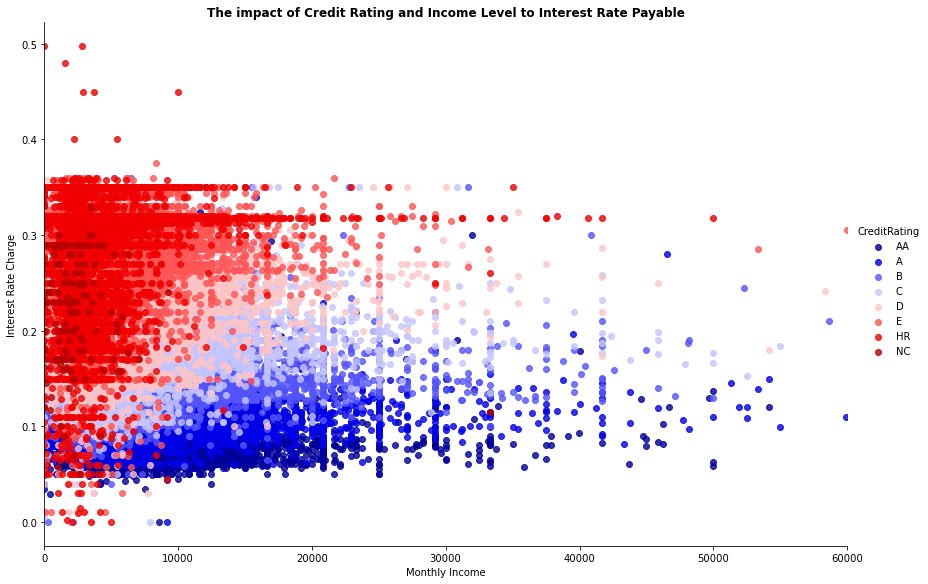

In [33]:
plt.figure(figsize=(20, 10))

g = sns.FacetGrid(data=prosper, hue='CreditRating', size=8, aspect=1.5, palette='seismic');
g = g.map(sns.regplot, 'StatedMonthlyIncome', 'BorrowerRate', x_jitter=0.04, fit_reg=False);
g.add_legend();
plt.xlabel('Monthly Income');
plt.xlim((0, 60000));
plt.ylabel('Interest Rate Charge');
plt.title('The impact of Credit Rating and Income Level to Interest Rate Payable', fontweight='bold');

There are a couple of insights from this visualization
- The higher your earnings, the more probability you secure a positive credit rating
- The lower your credit ratings, the higher your interest chargeable
- Credit rating plays a significant role in the interest chargeable.

/Users/ifelade/opt/anaconda3/envs/second_env/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x720 with 0 Axes>

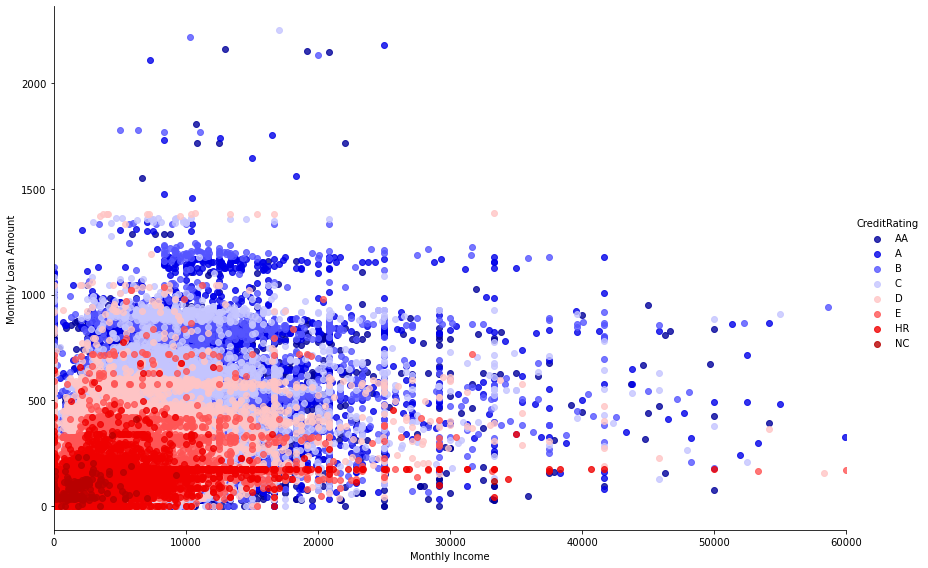

In [34]:
plt.figure(figsize=(20, 10))

g = sns.FacetGrid(data=prosper, hue='CreditRating', size=8, aspect=1.5, palette='seismic');
g = g.map(sns.regplot, 'StatedMonthlyIncome', 'MonthlyLoanPayment', x_jitter=0.04, fit_reg=False);
g.add_legend()
plt.xlabel('Monthly Income');
plt.xlim((0, 60000));
plt.ylabel('Monthly Loan Amount');

There are a couple of insights from this visualization in addition to the previously outline insights
- The lender are more likely to approve out higher loan sizes to borrowers with good ratings
- There is a positive corelation between income level and loan basket size for income level below $30k. However, the loan amount shows a ceiling for income level above $30k.


## Conclusions
>Summary of the main findings and reflection on the steps taken during the data exploration.

- Credit Rating is very important factor in Interest Rate Chargeable
- Higher Income Level is positively correlated with Credit Rating
- Credit Rating increases the access / likelihood tto access higher loan basket sizes
- The higher interest rate payable increases the probability of default.
- Debt Consolidation is the most popular reasons for loans
- October to March is the period with increased activity for loan disbursement
